In [1]:
task = "Deblurring"  
model_handle_map = {
    
    "Deblurring": [
        "https://tfhub.dev/sayakpaul/maxim_s-3_deblurring_gopro/1",
        "https://raw.githubusercontent.com/ManviMahajanRepo/Image-Deblurring-using-MAXIM-model/main/Images/1.jpg",
        "https://raw.githubusercontent.com/ManviMahajanRepo/Image-Deblurring-using-MAXIM-model/main/Images/2.jpg",
        "https://raw.githubusercontent.com/ManviMahajanRepo/Image-Deblurring-using-MAXIM-model/main/Images/3.jpg",
        "https://raw.githubusercontent.com/ManviMahajanRepo/Image-Deblurring-using-MAXIM-model/main/Images/4.jpg",
        "https://raw.githubusercontent.com/ManviMahajanRepo/Image-Deblurring-using-MAXIM-model/main/Images/5.jpg",
        "https://raw.githubusercontent.com/ManviMahajanRepo/Image-Deblurring-using-MAXIM-model/main/Images/6.jpg",
        "https://raw.githubusercontent.com/ManviMahajanRepo/Image-Deblurring-using-MAXIM-model/main/Images/7.jpg",
        "https://raw.githubusercontent.com/ManviMahajanRepo/Image-Deblurring-using-MAXIM-model/main/Images/8.jpg",
        "https://raw.githubusercontent.com/ManviMahajanRepo/Image-Deblurring-using-MAXIM-model/main/Images/9.jpg",
        "https://raw.githubusercontent.com/ManviMahajanRepo/Image-Deblurring-using-MAXIM-model/main/Images/10.jpg",
        "https://raw.githubusercontent.com/ManviMahajanRepo/Image-Deblurring-using-MAXIM-model/main/Images/11.jpg",
        "https://raw.githubusercontent.com/ManviMahajanRepo/Image-Deblurring-using-MAXIM-model/main/Images/12.jpg",
        "https://raw.githubusercontent.com/ManviMahajanRepo/Image-Deblurring-using-MAXIM-model/main/Images/13.jpg",
        "https://raw.githubusercontent.com/ManviMahajanRepo/Image-Deblurring-using-MAXIM-model/main/Images/14.jpg",
        "https://raw.githubusercontent.com/ManviMahajanRepo/Image-Deblurring-using-MAXIM-model/main/Images/15.jpg",
    ],
}

model_handle = model_handle_map[task]
ckpt = model_handle[0]
print(f"TF-Hub handle: {ckpt}.")

TF-Hub handle: https://tfhub.dev/sayakpaul/maxim_s-3_deblurring_gopro/1.


In [2]:
import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt

from PIL import Image
import numpy as np

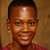

In [4]:
image_url1 = model_handle[1]
image_url2 = model_handle[2]
image_url3 = model_handle[3]
image_url4 = model_handle[4]
image_url5 = model_handle[5]
image_url6 = model_handle[6]
image_url7 = model_handle[7]
image_url8 = model_handle[8]
image_url9 = model_handle[9]
image_url10 = model_handle[10]
image_url11 = model_handle[11]
image_url12 = model_handle[12]
image_url13 = model_handle[13]
image_url14 = model_handle[14]
image_url15 = model_handle[15]
image_path1 = tf.keras.utils.get_file(origin=image_url1)
image_path2 = tf.keras.utils.get_file(origin=image_url2)
image_path3 = tf.keras.utils.get_file(origin=image_url3)
image_path4 = tf.keras.utils.get_file(origin=image_url4)
image_path5 = tf.keras.utils.get_file(origin=image_url5)
image_path6 = tf.keras.utils.get_file(origin=image_url6)
image_path7 = tf.keras.utils.get_file(origin=image_url7)
image_path8 = tf.keras.utils.get_file(origin=image_url8)
image_path9 = tf.keras.utils.get_file(origin=image_url9)
image_path10 = tf.keras.utils.get_file(origin=image_url10)
image_path11 = tf.keras.utils.get_file(origin=image_url11)
image_path12 = tf.keras.utils.get_file(origin=image_url12)
image_path13 = tf.keras.utils.get_file(origin=image_url13)
image_path14 = tf.keras.utils.get_file(origin=image_url14)
image_path15 = tf.keras.utils.get_file(origin=image_url15)
Image.open(image_path1)
Image.open(image_path2)
Image.open(image_path3)
Image.open(image_path4)
Image.open(image_path5)
Image.open(image_path6)
Image.open(image_path7)
Image.open(image_path8)
Image.open(image_path9)
Image.open(image_path10)
Image.open(image_path11)
Image.open(image_path12)
Image.open(image_path13)
Image.open(image_path14)
Image.open(image_path15)

In [5]:
# Since the model was not initialized to take variable-length sizes (None, None, 3),
# we need to be careful about how we are resizing the images.
# From https://www.tensorflow.org/lite/examples/style_transfer/overview#pre-process_the_inputs
def resize_image(image, target_dim):
    # Resize the image so that the shorter dimension becomes `target_dim`.
    shape = tf.cast(tf.shape(image)[1:-1], tf.float32)
    short_dim = min(shape)
    scale = target_dim / short_dim
    new_shape = tf.cast(shape * scale, tf.int32)
    image = tf.image.resize(image, new_shape)

    # Central crop the image.
    image = tf.image.resize_with_crop_or_pad(image, target_dim, target_dim)

    return image


def process_image(image_path, target_dim=256):
    input_img1 = np.asarray(Image.open(image_path1).convert("RGB"), np.float32) / 255.0
    input_img2 = np.asarray(Image.open(image_path2).convert("RGB"), np.float32) / 255.0
    input_img3 = np.asarray(Image.open(image_path3).convert("RGB"), np.float32) / 255.0
    input_img4 = np.asarray(Image.open(image_path4).convert("RGB"), np.float32) / 255.0
    input_img5 = np.asarray(Image.open(image_path5).convert("RGB"), np.float32) / 255.0
    input_img6 = np.asarray(Image.open(image_path6).convert("RGB"), np.float32) / 255.0
    input_img7 = np.asarray(Image.open(image_path7).convert("RGB"), np.float32) / 255.0
    input_img8 = np.asarray(Image.open(image_path8).convert("RGB"), np.float32) / 255.0
    input_img9 = np.asarray(Image.open(image_path9).convert("RGB"), np.float32) / 255.0
    input_img10 = np.asarray(Image.open(image_path10).convert("RGB"), np.float32) / 255.0
    input_img11 = np.asarray(Image.open(image_path11).convert("RGB"), np.float32) / 255.0
    input_img12 = np.asarray(Image.open(image_path12).convert("RGB"), np.float32) / 255.0
    input_img13 = np.asarray(Image.open(image_path13).convert("RGB"), np.float32) / 255.0
    input_img14 = np.asarray(Image.open(image_path14).convert("RGB"), np.float32) / 255.0
    input_img15 = np.asarray(Image.open(image_path15).convert("RGB"), np.float32) / 255.0
    input_img1 = tf.expand_dims(input_img1, axis=0)
    input_img2 = tf.expand_dims(input_img2, axis=0)
    input_img3 = tf.expand_dims(input_img3, axis=0)
    input_img4 = tf.expand_dims(input_img4, axis=0)
    input_img5 = tf.expand_dims(input_img5, axis=0)
    input_img6 = tf.expand_dims(input_img6, axis=0)
    input_img7 = tf.expand_dims(input_img7, axis=0)
    input_img8 = tf.expand_dims(input_img8, axis=0)
    input_img9 = tf.expand_dims(input_img9, axis=0)
    input_img10 = tf.expand_dims(input_img10, axis=0)
    input_img11 = tf.expand_dims(input_img11, axis=0)
    input_img12 = tf.expand_dims(input_img12, axis=0)
    input_img13 = tf.expand_dims(input_img13, axis=0)
    input_img14 = tf.expand_dims(input_img14, axis=0)
    input_img15 = tf.expand_dims(input_img15, axis=0)
    input_img1 = resize_image(input_img1, target_dim)
    input_img2 = resize_image(input_img2, target_dim)
    input_img3 = resize_image(input_img3, target_dim)
    input_img4 = resize_image(input_img4, target_dim)
    input_img5 = resize_image(input_img5, target_dim)
    input_img6 = resize_image(input_img6, target_dim)
    input_img7 = resize_image(input_img7, target_dim)
    input_img8 = resize_image(input_img8, target_dim)
    input_img9 = resize_image(input_img9, target_dim)
    input_img10 = resize_image(input_img10, target_dim)
    input_img11 = resize_image(input_img11, target_dim)
    input_img12 = resize_image(input_img12, target_dim)
    input_img13 = resize_image(input_img13, target_dim)
    input_img14 = resize_image(input_img14, target_dim)
    input_img15 = resize_image(input_img15, target_dim)
    return input_img1
    return input_img2
    return input_img3
    return input_img4
    return input_img5
    return input_img6
    return input_img7
    return input_img8
    return input_img9
    return input_img10
    return input_img11
    return input_img12
    return input_img13
    return input_img14
    return input_img15

In [6]:
def get_model(model_url: str, input_resolution: tuple) -> tf.keras.Model:
    inputs = tf.keras.Input((*input_resolution, 3))
    hub_module = hub.KerasLayer(model_url)

    outputs = hub_module(inputs)

    return tf.keras.Model(inputs, outputs)


# Based on https://github.com/google-research/maxim/blob/main/maxim/run_eval.py
def infer(image_path: str, model: tf.keras.Model, input_resolution=(256, 256)):
    preprocessed_image1 = process_image(image_path1, input_resolution[0])
    preprocessed_image2 = process_image(image_path2, input_resolution[0])
    preprocessed_image3 = process_image(image_path3, input_resolution[0])
    preprocessed_image4 = process_image(image_path4, input_resolution[0])
    preprocessed_image5 = process_image(image_path5, input_resolution[0])
    preprocessed_image6 = process_image(image_path6, input_resolution[0])
    preprocessed_image7 = process_image(image_path7, input_resolution[0])
    preprocessed_image8 = process_image(image_path8, input_resolution[0])
    preprocessed_image9 = process_image(image_path9, input_resolution[0])
    preprocessed_image10 = process_image(image_path10, input_resolution[0])
    preprocessed_image11 = process_image(image_path11, input_resolution[0])
    preprocessed_image12 = process_image(image_path12, input_resolution[0])
    preprocessed_image13 = process_image(image_path13, input_resolution[0])
    preprocessed_image14 = process_image(image_path14, input_resolution[0])
    preprocessed_image15 = process_image(image_path15, input_resolution[0])

    preds1 = model.predict(preprocessed_image1)
    preds2 = model.predict(preprocessed_image2)
    preds3 = model.predict(preprocessed_image3)
    preds4 = model.predict(preprocessed_image4)
    preds5 = model.predict(preprocessed_image5)
    preds6 = model.predict(preprocessed_image6)
    preds7 = model.predict(preprocessed_image7)
    preds8 = model.predict(preprocessed_image8)
    preds9 = model.predict(preprocessed_image9)
    preds10 = model.predict(preprocessed_image10)
    preds11 = model.predict(preprocessed_image11)
    preds12 = model.predict(preprocessed_image12)
    preds13 = model.predict(preprocessed_image13)
    preds14 = model.predict(preprocessed_image14)
    preds15 = model.predict(preprocessed_image15)
    
    if isinstance(preds1, list):
        preds1 = preds1[-1] 
        if isinstance(preds2, list):
          preds2 = preds2[-1]
          if isinstance(preds3, list):
            preds3 = preds3[-1]
            if isinstance(preds4, list):
              preds4 = preds4[-1]
              if isinstance(preds5, list):
                preds5 = preds5[-1]
                if isinstance(preds6, list):
                  preds6 = preds6[-1]
                  if isinstance(preds7, list):
                    preds7 = preds7[-1]
                    if isinstance(preds8, list):
                      preds8 = preds8[-1]
                      if isinstance(preds9, list):
                        preds9 = preds9[-1]
                        if isinstance(preds10, list):
                          preds10 = preds10[-1]
                          if isinstance(preds11, list):
                            preds11 = preds11[-1]
                            if isinstance(preds12, list):
                              preds12 = preds12[-1]
                              if isinstance(preds12, list):
                                preds13 = preds13[-1]
                                if isinstance(preds14, list):
                                  preds14 = preds14[-1]
                                  if isinstance(preds15, list):
                                    preds15 = preds15[-1]

    

    preds1 = np.array(preds1[0], np.float32)
    preds2 = np.array(preds2[0], np.float32)
    preds3 = np.array(preds3[0], np.float32)
    preds4 = np.array(preds4[0], np.float32)
    preds5 = np.array(preds5[0], np.float32)
    preds6 = np.array(preds6[0], np.float32)
    preds7 = np.array(preds7[0], np.float32)
    preds8 = np.array(preds8[0], np.float32)
    preds9 = np.array(preds9[0], np.float32)
    preds10 = np.array(preds10[0], np.float32)
    preds11 = np.array(preds11[0], np.float32)
    preds12 = np.array(preds12[0], np.float32)
    preds13 = np.array(preds13[0], np.float32)
    preds14 = np.array(preds14[0], np.float32)
    preds15 = np.array(preds15[0], np.float32)
    final_pred_image1 = np.array((np.clip(preds1, 0.0, 1.0)).astype(np.float32))
    final_pred_image2 = np.array((np.clip(preds2, 0.0, 1.0)).astype(np.float32))
    final_pred_image3 = np.array((np.clip(preds3, 0.0, 1.0)).astype(np.float32))
    final_pred_image4 = np.array((np.clip(preds4, 0.0, 1.0)).astype(np.float32))
    final_pred_image5 = np.array((np.clip(preds5, 0.0, 1.0)).astype(np.float32))
    final_pred_image6 = np.array((np.clip(preds6, 0.0, 1.0)).astype(np.float32))
    final_pred_image7 = np.array((np.clip(preds7, 0.0, 1.0)).astype(np.float32))
    final_pred_image8 = np.array((np.clip(preds8, 0.0, 1.0)).astype(np.float32))
    final_pred_image9 = np.array((np.clip(preds9, 0.0, 1.0)).astype(np.float32))
    final_pred_image10 = np.array((np.clip(preds10, 0.0, 1.0)).astype(np.float32))
    final_pred_image11 = np.array((np.clip(preds11, 0.0, 1.0)).astype(np.float32))
    final_pred_image12 = np.array((np.clip(preds12, 0.0, 1.0)).astype(np.float32))
    final_pred_image13 = np.array((np.clip(preds13, 0.0, 1.0)).astype(np.float32))
    final_pred_image14 = np.array((np.clip(preds14, 0.0, 1.0)).astype(np.float32))
    final_pred_image15 = np.array((np.clip(preds15, 0.0, 1.0)).astype(np.float32))
    return final_pred_image1
    return final_pred_image2
    return final_pred_image3
    return final_pred_image4
    return final_pred_image5
    return final_pred_image6
    return final_pred_image7
    return final_pred_image8
    return final_pred_image9
    return final_pred_image10
    return final_pred_image11
    return final_pred_image12
    return final_pred_image13
    return final_pred_image14
    return final_pred_image15


In [7]:
input_resolution = (256, 256)

model = get_model(ckpt, input_resolution)

final_pred_image1 = infer(image_path1, model, input_resolution)
final_pred_image2 = infer(image_path2, model, input_resolution)
final_pred_image3 = infer(image_path3, model, input_resolution)
final_pred_image4 = infer(image_path4, model, input_resolution)
final_pred_image5 = infer(image_path5, model, input_resolution)
final_pred_image6 = infer(image_path6, model, input_resolution)
final_pred_image7 = infer(image_path7, model, input_resolution)
final_pred_image8 = infer(image_path8, model, input_resolution)
final_pred_image9 = infer(image_path9, model, input_resolution)
final_pred_image10 = infer(image_path10, model, input_resolution)
final_pred_image11 = infer(image_path11, model, input_resolution)
final_pred_image12 = infer(image_path12, model, input_resolution)
final_pred_image13 = infer(image_path13, model, input_resolution)
final_pred_image14 = infer(image_path14, model, input_resolution)
final_pred_image15 = infer(image_path15, model, input_resolution)

1/1 [==============================] - 0s 420ms/step


<ipython-input-11-c9481bf5ab10>:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
<ipython-input-11-c9481bf5ab10>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
<ipython-input-11-c9481bf5ab10>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created an

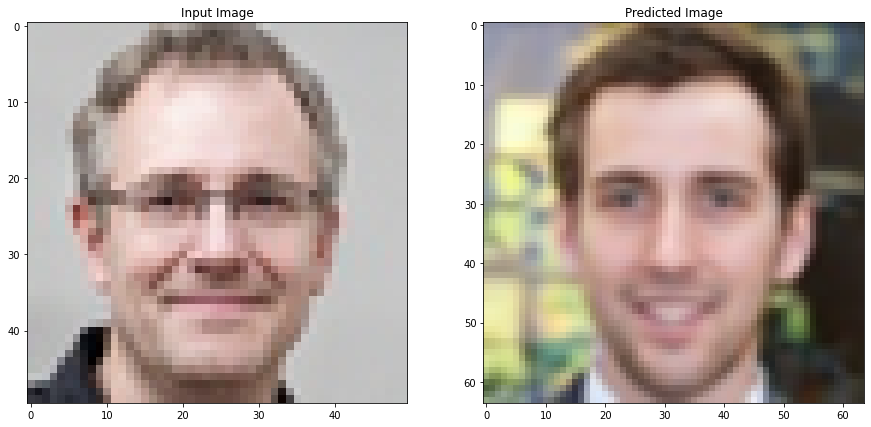

In [11]:
# Based on https://www.tensorflow.org/lite/examples/style_transfer/overview#visualize_the_inputs
def imshow(image, title=None):
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)


plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
input_image1 = np.asarray(Image.open(image_path1).convert("RGB"), np.float32) / 255.0
input_image2 = np.asarray(Image.open(image_path2).convert("RGB"), np.float32) / 255.0
input_image3 = np.asarray(Image.open(image_path3).convert("RGB"), np.float32) / 255.0
input_image4 = np.asarray(Image.open(image_path4).convert("RGB"), np.float32) / 255.0
input_image5 = np.asarray(Image.open(image_path5).convert("RGB"), np.float32) / 255.0
input_image6 = np.asarray(Image.open(image_path6).convert("RGB"), np.float32) / 255.0
input_image7 = np.asarray(Image.open(image_path7).convert("RGB"), np.float32) / 255.0
input_image8 = np.asarray(Image.open(image_path8).convert("RGB"), np.float32) / 255.0
input_image9 = np.asarray(Image.open(image_path9).convert("RGB"), np.float32) / 255.0
input_image10 = np.asarray(Image.open(image_path10).convert("RGB"), np.float32) / 255.0
input_image11 = np.asarray(Image.open(image_path11).convert("RGB"), np.float32) / 255.0
input_image12 = np.asarray(Image.open(image_path12).convert("RGB"), np.float32) / 255.0
input_image13 = np.asarray(Image.open(image_path13).convert("RGB"), np.float32) / 255.0
input_image14 = np.asarray(Image.open(image_path14).convert("RGB"), np.float32) / 255.0
input_image15 = np.asarray(Image.open(image_path15).convert("RGB"), np.float32) / 255.0
plt.subplot(1, 2, 1)
imshow(input_image1, "Input Image")
plt.subplot(1, 2, 2)
imshow(final_pred_image1, "Predicted Image")
plt.subplot(1, 2, 1)
imshow(input_image2, "Input Image")
plt.subplot(1, 2, 2)
imshow(final_pred_image2, "Predicted Image")
imshow(input_image3, "Input Image")
imshow(final_pred_image3, "Predicted Image")
imshow(input_image4, "Input Image")
imshow(final_pred_image4, "Predicted Image")
imshow(input_image5, "Input Image")
imshow(final_pred_image5, "Predicted Image")
imshow(input_image6, "Input Image")
imshow(final_pred_image6, "Predicted Image")
imshow(input_image7, "Input Image")
imshow(final_pred_image7, "Predicted Image")
imshow(input_image8, "Input Image")
imshow(final_pred_image8, "Predicted Image")
imshow(input_image9, "Input Image")
imshow(final_pred_image9, "Predicted Image")
imshow(input_image10, "Input Image")
imshow(final_pred_image10, "Predicted Image")
imshow(input_image11, "Input Image")
imshow(final_pred_image11, "Predicted Image")
imshow(input_image12, "Input Image")
imshow(final_pred_image12, "Predicted Image")
imshow(input_image13, "Input Image")
imshow(final_pred_image13, "Predicted Image")
imshow(input_image14, "Input Image")
imshow(final_pred_image14, "Predicted Image")
imshow(input_image15, "Input Image")
imshow(final_pred_image15, "Predicted Image")

plt.subplot(1, 2, 2)
